In [50]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torchvision import datasets, transforms

transform = transforms.ToTensor()

transform = transforms.ToTensor()
train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

# Convert tensors to numpy and normalize pixel values to range [0,1]
x_train = train_dataset.data.numpy() / 255 # Normalize pixel values
y_train = train_dataset.targets.numpy()
x_test = test_dataset.data.numpy() / 255
y_test = test_dataset.targets.numpy()


W_1 = np.random.rand(784,128) - 0.5
b_1 = np.random.rand(128, 1) - 0.5 

W_2 = np.random.rand(128, 128) - 0.5 
b_2 = np.random.rand(128, 1) - 0.5

W_3 = np.random.rand(128, 10) - 0.5
b_3 = np.random.rand(10, 1) - 0.5 #ορίζουμε τυχαία τους πίνακς των biases και weights με τις απαιτούμενες διαστάσεις

A_layers = []
for i in range(len(x_train)):
   A_layers.append(x_train[i].reshape(784, 1))

def ReLU(x):
  return np.maximum(0, x)

def softmax(Z):
  Z = Z - np.max(Z)  
  exp_values = np.exp(Z)
  sum_exp_values = np.sum(exp_values)     #απλά εφαρμόζουμε τον τύπο της softmax και κάνουμε τις τιμές των 10 νευρώνων μία κατανομή διακριτής τυχαίας μεταβλητής
  A_out_prob = exp_values / sum_exp_values
  return A_out_prob


def forwardProp(A, W_1, b_1, W_2, b_2, W_3, b_3):
    # Forward propagation through the network
    # A is a 784x1 input vector (layer 0), W matrices are weight matrices, b vectors are bias vectors
    
    # First hidden layer
    Z_1 = np.dot(W_1.T, A) + b_1
    A_1 = ReLU(Z_1)
    
    # Second hidden layer
    Z_2 = np.dot(W_2.T, A_1) + b_2
    A_2 = ReLU(Z_2)
    
    # Output layer
    Z_3 = np.dot(W_3.T, A_2) + b_3
    A_3 = softmax(Z_3)
    
    return A_1, Z_1, A_2, Z_2, A_3, Z_3

def d_ReLU(x):
  return x > 0


def backProp(A, A_1, A_2, A_3, Z_1, Z_2, Z_3, W_1, W_2, W_3, label):
    # Create one-hot encoded vector for the true label
    vector = np.zeros((10, 1))
    vector[label, 0] = 1
    
    # Output layer gradients
    dZ3 = A_3 - vector  # Gradient of cross-entropy loss with softmax
    dW3 = np.dot(A_2, dZ3.T)
    db3 = dZ3
    
    # Second hidden layer gradients
    dA2 = np.dot(W_3, dZ3)
    dZ2 = dA2 * d_ReLU(Z_2)
    dW2 = np.dot(A_1, dZ2.T)
    db2 = dZ2
    
    # First hidden layer gradients
    dA1 = np.dot(W_2, dZ2)
    dZ1 = dA1 * d_ReLU(Z_1)
    dW1 = np.dot(A, dZ1.T)
    db1 = dZ1
    
    return dW1, db1, dW2, db2, dW3, db3

    


def gradientDescent(W_1, b_1, W_2, b_2, W_3, b_3, learning_rate, epochs):
    accuracy_list = []
    
    for epoch in range(epochs):
        correct_predictions = 0
        total_samples = len(x_train)
        
        # Shuffle the training data for each epoch
        indices = np.random.permutation(total_samples)
        shuffled_A_layers = [A_layers[i] for i in indices]
        shuffled_y_train = y_train[indices]
        
        for i in range(total_samples):
            # Get current training example
            A = shuffled_A_layers[i]
            y = shuffled_y_train[i]
            
            # Forward propagation
            A_1, Z_1, A_2, Z_2, A_3, Z_3 = forwardProp(A, W_1, b_1, W_2, b_2, W_3, b_3)
            
            # Check prediction
            predicted_label = np.argmax(A_3)
            if predicted_label == y:
                correct_predictions += 1
            
            # Backpropagation
            dW_1, db_1, dW_2, db_2, dW_3, db_3 = backProp(A, A_1, A_2, A_3, Z_1, Z_2, Z_3, W_1, W_2, W_3, y)
            
            # Update parameters
            W_1 = W_1 - learning_rate * dW_1
            b_1 = b_1 - learning_rate * db_1
            W_2 = W_2 - learning_rate * dW_2
            b_2 = b_2 - learning_rate * db_2
            W_3 = W_3 - learning_rate * dW_3
            b_3 = b_3 - learning_rate * db_3
        
        # Calculate and record accuracy for this epoch
        accuracy = (correct_predictions / total_samples) * 100
        accuracy_list.append(accuracy)
        print(f"Epoch {epoch+1}, Accuracy: {accuracy:.2f}%")
        
        # Learning rate decay
        if (epoch + 1) % 5 == 0:
            learning_rate *= 0.5
            print(f"Learning rate decayed to {learning_rate}")
    
    return accuracy_list[-1], W_1, b_1, W_2, b_2, W_3, b_3

In [52]:
accuracy, c_W_1, c_b_1, c_W_2, c_b_2 , c_W_3 , c_b_3 = gradientDescent(W_1, b_1, W_2, b_2, W_3, b_3, 0.01, 8)

Starting training...
Epoch 1, Accuracy: 79.04%


KeyboardInterrupt: 

/var/folders/6f/0r5f_r2d4b19rx1kcvn6hym80000gn/T/ipykernel_65131/3401866418.py:44: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  A_1 = np.dot(W_1.T , A)


Training accuracy: 10.00%
9000
Label: tensor(7)
Prediction: 0


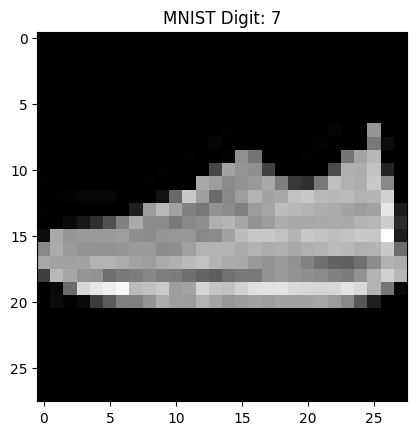

Label: tensor(2)
Prediction: 0


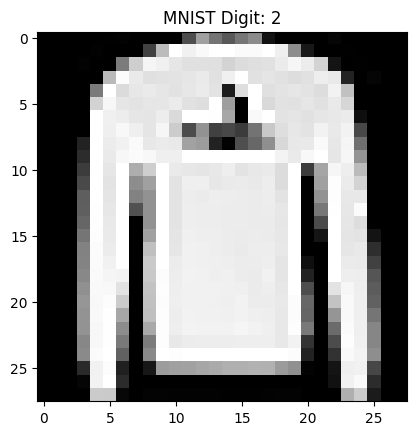

Label: tensor(3)
Prediction: 0


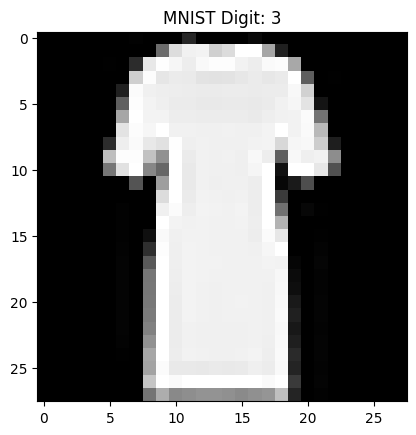

Label: tensor(2)
Prediction: 0


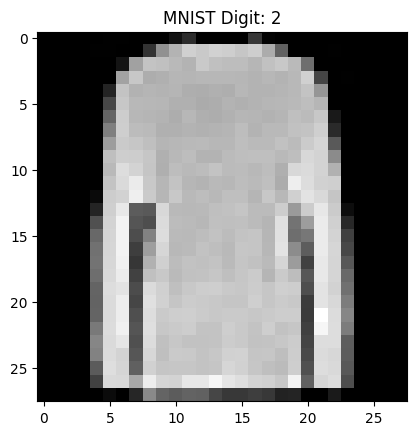

Label: tensor(4)
Prediction: 0


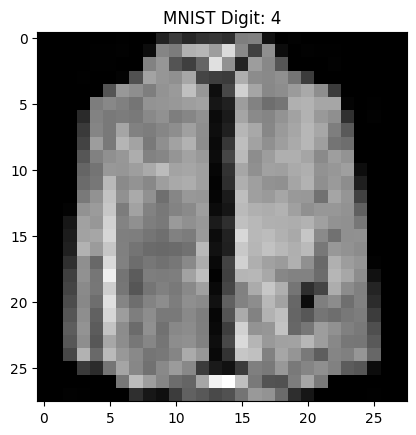

Label: tensor(6)
Prediction: 0


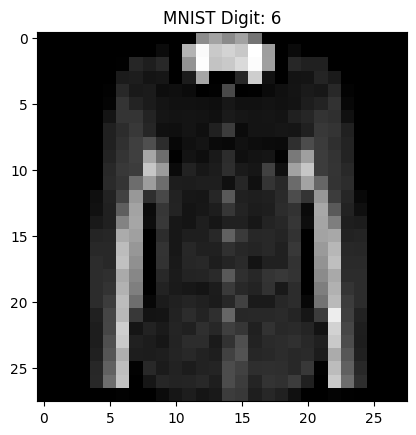

Label: tensor(6)
Prediction: 0


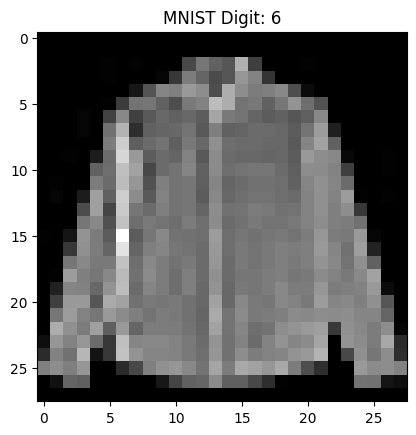

Label: tensor(4)
Prediction: 0


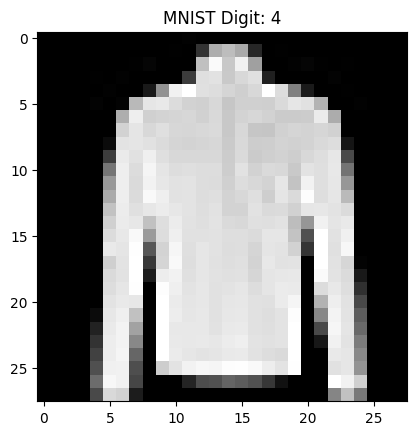

Label: tensor(3)
Prediction: 0


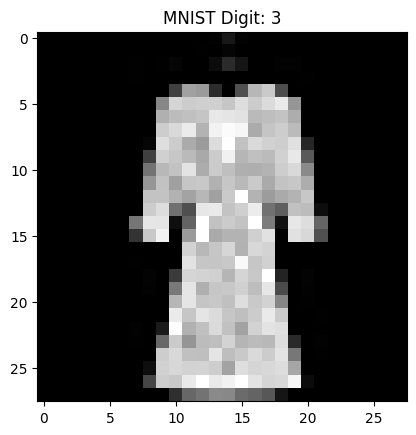

Label: tensor(2)
Prediction: 0


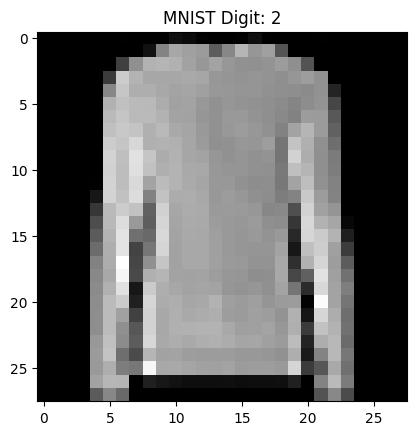

In [26]:

def evaluate_test_accuracy(W_1, b_1, W_2, b_2, W_3, b_3, x_data, y_data):
    correct_predictions = 0
    total_samples = len(x_data)
    wrong_index = []

    for n in range(total_samples):
        input_data = x_data[n].reshape(784, 1)
        
        A_1, Z_1, A_2, Z_2, A_3, Z_3 = forwardProp(input_data, W_1, b_1, W_2, b_2, W_3, b_3)
        
        predicted_label = np.argmax(A_2)
    
        if predicted_label == y_data[n]:
            correct_predictions += 1
        else:
            wrong_index.append(n)
    
    accuracy_1 = (correct_predictions / total_samples) * 100
    
    return accuracy_1, wrong_index


test_accuracy, wrong = evaluate_test_accuracy(c_W_1, c_b_1, c_W_2, c_b_2, c_W_3, c_b_3, x_test, y_test)

print(f"Training accuracy: {test_accuracy:.2f}%")
print(len(wrong))



indexes = [61, 115, 124, 149, 151, 217, 241, 247, 266, 321]
for i in indexes:
    input_data = x_test[i].reshape(784, 1)
    A_1, Z_1, A_2 , Z_2, A_3 , Z_3 = forwardProp(input_data, c_W_1, c_b_1 , c_W_2, c_b_2, c_W_3, c_b_3)
    predicted_label = np.argmax(A_2)
    print("Label:" , y_test[i])
    print("Prediction:", predicted_label)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"MNIST Digit: {y_test[i]}") 
    plt.show()

